# Unit 1 - Linear Algebra

Linear algebra is the branch of mathematics concerning linear equations and linear functions and their representations through matrices and vector spaces.

Machine Learning relies heavily on Linear Algebra, so it is essential to understand what vectors and matrices are, what operations you can perform with them, and how they can be useful.

If you have had no exposure at all to linear algebra, this chapter will teach you enough to read this book.

In [1]:
# Imports
import tensorflow as tf
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Auxiliars functions for plots
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np
import tensorflow as tf


def vector_plot(vecs, xlim, ylim, cols=["#1190FF", "#FF9A13"], alpha=1):
    plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'red'})
    plt.axvline(x=0, color='k', zorder=0)
    plt.axhline(y=0, color='k', zorder=0)

    for i in range(len(vecs)):
        if (isinstance(alpha, list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha_i)
    plt.ylim(-xlim, xlim)
    plt.xlim(-ylim, ylim)
    plt.grid()


def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)


def plot_transform(P_before, P_after, text_before, text_after, name, color=['#FF9A13', '#1190FF'], axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(tf.transpose(P_before), tf.transpose(P_after)):
            plot_vector2d(vector_before, color="#FF9A13", linestyle="--")
            plot_vector2d(vector_after, color="#1190FF", linestyle="-")
    plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'red'})
    plt.gca().add_artist(Polygon(tf.transpose(P_before), alpha=0.2))
    plt.gca().add_artist(Polygon(tf.transpose(P_after), alpha=0.3, color="#FF9A13"))
    plt.text(-.25, 1, text_before, size=18, color=color[1])
    plt.text(1.5, 0, text_after, size=18, color=color[0])
    plt.title(name, color='w')
    plt.axis(axis)
    plt.grid()


def evaluate(tensors):
    """Evaluates Tensor or EagerTensor to Numpy `ndarray`s.
    Args:
    tensors: Object of `Tensor` or EagerTensor`s; can be `list`, `tuple`,
      `namedtuple` or combinations thereof.
    Returns:
      ndarrays: Object with same structure as `tensors` except with `Tensor` or
        `EagerTensor`s replaced by Numpy `ndarray`s.
    """
    return tf.nest.pack_sequence_as(tensors,[t.numpy() if tf.is_tensor(t) else t for t in tf.nest.flatten(tensors)])

# Section 1.1: Scalars, Vectors, Matrices and Tensors

__Scalars:__ are just a single number $x \in \mathbb{R}$


__Vectors:__ are an array of numbers $ \mathbf{x} \in \mathbb{R} ^n$. The vectors are always written vertically. Normally in the literature you can find vector row and vector column, but the row vector is only the usual transposed vector.

__Matrices:__ A matrix is a 2D-array of numbers, so each element is identified by two indices instead of just one. If a real valued matrix $A$ has a height of *m* and a width of *n*, then we say that $A \in \mathbb{R}^{m \times n}$. We identify the elements of the matrix as $A_{m,n}$ where *m* represents the row and *n* represents the column.

![Scalars, Vectors, Matrices and Tensors](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0201a.png)

__Tensors:__ In the general case, are an array of numbers arranged on a regular grid with a variable number of axes is knows as a tensor. We identify the elements of a tensor $A$ at coordinates(*i, j, k*) by writing $A_{i, j, k}$. But to truly understand tensors, we need to expand the way we think of vectors as only arrows with a magnitude and direction. Remember that a vector can be represented by three components, namely the x, y and z components (basis vectors). If you have a pen and a paper, let's do a small experiment, place the pen vertically on the paper and slant it by some angle and now shine a light from top such that the shadow of the pen falls on the paper, this shadow, represents the x component of the vector "pen" and the height from the paper to the tip of the pen is the y component. Now, let's take these components to describe tensors, imagine, you are Indiana Jones or a treasure hunter and you are trapped in a cube and there are three arrows flying towards you from the three faces (to represent x, y, z axis) of the cube, I know this will be the last thing you would think in such a situation but you can think of those three arrows as vectors pointing towards you from the three faces of the cube and you can represent those vectors (arrows) in x, y and z components, now that is a rank 2 tensor (matrix) with 9 components. Remember that this is a very very simple explanation of tensors. Following is a representation of a tensor:

![Tensors](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0201b.PNG)


#Operations with Tensors

We can add or subtract  matrices to each other as long as they have the same shape, just by adding their corresponding elements:

$$\color{orange}{C = A \pm B \ where \ C_{i,j} = A_{i,j} \pm B_{i,j} \tag{1}}$$


In tensorial notation :

- Tensor with dimension 0 is a Scalar
- Tensor with dimension 1 is a Vector
- Tensor with dimensions 2 is a Matrix
- Tensor with dimensions 3 is a 3-Tensor
- Tensor with dimensions n is a n-Tensor or Tensor of order-n

In [62]:
# let's create a ones 3x3 tensor of order 2
rank_2_tensor_A = tf.ones([3, 3], name='MatrixA')
print("3x3 Tensor of order 2 A: \n{}\n".format(rank_2_tensor_A))

# let's manually create a 3x3 rank two tensor and specify the data type as float
rank_2_tensor_B = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]], name='MatrixB', dtype=tf.float32)
print("3x3 Tensor of order 2 B: \n{}\n".format(rank_2_tensor_B))

# addition of the two tensors
rank_2_tensor_C = tf.add(rank_2_tensor_A, rank_2_tensor_B, name='MatrixC')
print("Tensor of order 2 C with shape={} and elements: \n{}".format(rank_2_tensor_C.shape, rank_2_tensor_C))

# Substract the first column of rank_2_tensor_A with rank_2_tensor_B manually
# ------- Your code is here -------- #

# toma el primer elemento de cada fila
column = []
for i in range(rank_2_tensor_A.shape[0]):
  column.append(rank_2_tensor_A[i][0])

#rank_2_tensor_A[:,0]
rank_2_tensor_D = tf.subtract(column,rank_2_tensor_B, name='MatrixD')
print("Tensor of order 2 C with shape={} and elements: \n{}".format(rank_2_tensor_D.shape, rank_2_tensor_D))


3x3 Tensor of order 2 A: 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

3x3 Tensor of order 2 B: 
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

Tensor of order 2 C with shape=(3, 3) and elements: 
[[ 2.  3.  4.]
 [ 5.  6.  7.]
 [ 8.  9. 10.]]
  [<tf.Tensor: shape=(), dtype=float32, numpy=1.0>, <tf.Tensor: shape=(), dtype=float32, numpy=1.0>, <tf.Tensor: shape=(), dtype=float32, numpy=1.0>]
Tensor of order 2 C with shape=(3, 3) and elements: 
[[ 0. -1. -2.]
 [-3. -4. -5.]
 [-6. -7. -8.]]


In [53]:
rank_2_tensor_A.shape[0]

3

We can only add two tensors which have the same dimension, then you must create a function that verifies the dimensions of the tensioners and say if it is possible the sum of them is possible

In [39]:
## Your coded is here

def comp_shapes(a , b):

  if a.shape == b.shape:
    return True
  else:
    return False

comp_shapes(rank_2_tensor_A, rank_2_tensor_A)  

True

We can also add a scalar to a matrix or multiply a matrix by a scalar, just by performing that operation on each element of a matrix:

$$\color{orange}{D = a \cdot B \pm c, \ where  \ D_{i,j} = a \cdot B_{i,j} \pm c \tag{2}}$$

In [ ]:
A = tf.ones((4,3))
b = tf.ones((4,1))

A+b

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]], dtype=float32)>

In [7]:
# Create scalar a, c and Matrix B
rank_0_tensor_a = tf.constant(2, name="scalar_a", dtype=tf.float32)
rank_2_tensor_B = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]], name='MatrixB', dtype=tf.float32)
rank_0_tensor_c = tf.constant(3, name="scalar_c", dtype=tf.float32)

# multiplying aB
multiply_scalar = tf.multiply(rank_0_tensor_a, rank_2_tensor_B)
# adding aB + c
rank_2_tensor_D = tf.add(multiply_scalar, rank_0_tensor_c)

print("""Original Tensor of order 2 B: \n{0} \n\nScalar a: {1}
Tensor of order 2 for aB: \n{2} \n\nScalar c: {3} \nTensor of order 2 D = aB + c: \n{4}
""".format(rank_2_tensor_B, rank_0_tensor_a, multiply_scalar, rank_0_tensor_c, rank_2_tensor_D))

Original Tensor of order 2 B: 
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]] 

Scalar a: 2.0
Tensor of order 2 for aB: 
[[ 2.  4.  6.]
 [ 8. 10. 12.]
 [14. 16. 18.]] 

Scalar c: 3.0 
Tensor of order 2 D = aB + c: 
[[ 5.  7.  9.]
 [11. 13. 15.]
 [17. 19. 21.]]



One important operation on matrices is the __transpose__. The transpose of a matrix is the mirror image of the martrix across a diagonal line, called the __main diagonal__. We denote the transpose of a matrix $A$ as $A^\top$ and is defined as such: $(A^\top)_{i, j} = A_{j, i}$

In [ ]:
# Creating a Matrix E
rank_2_tensor_E = tf.constant([[1, 2, 3], [4, 5, 6]])
# Transposing Matrix E
transpose_E = tf.transpose(rank_2_tensor_E, name="transposeE")

print("""Order 2 Tensor E of shape: {0} and elements: \n{1}\n
Transpose of Order 2 Tensor E of shape: {2} and elements: \n{3}""".format(rank_2_tensor_E.shape, rank_2_tensor_E, 
                                                                         transpose_E.shape, transpose_E))

Order 2 Tensor E of shape: (2, 3) and elements: 
[[1 2 3]
 [4 5 6]]

Transpose of Order 2 Tensor E of shape: (3, 2) and elements: 
[[1 4]
 [2 5]
 [3 6]]


In deep learning we allow the addition of matrix and a vector, yielding another matrix where $C_{i, j} = A_{i, j} + b_{j}$. In other words, the vector $b$ is added to each row of the matrix. This implicit copying of $b$ to many locations is called __broadcasting__

In [8]:
# Creating a vector b
rank_1_tensor_b = tf.constant([[4.], [5.], [6.]])
# Broadcasting a vector b to a matrix A such that it yields a matrix F = A + b
rank_2_tensor_F = tf.add(rank_2_tensor_A, rank_1_tensor_b)

print("""Tensor of order 2 A: \n{0}\n \nTensor of order 2 b: \n{1} 
\nTensor of order 2 F = A + b:\n{2}""".format(rank_2_tensor_A, rank_1_tensor_b, rank_2_tensor_F))

Tensor of order 2 A: 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
 
Tensor of order 2 b: 
[[4.]
 [5.]
 [6.]] 

Tensor of order 2 F = A + b:
[[5. 5. 5.]
 [6. 6. 6.]
 [7. 7. 7.]]


#Multiplying Matrices and Vectors

To define the matrix product of matrices $A \ \text{and} \ B, \ A$ must have the same number of columns as $B$. If $A$ is of shape *m x n* and $B$ is of shape *n x p*, then $C$ is of shape *m x p*.

$$\color{orange}{C_{i, j} = \displaystyle\sum_k A_{i, k} B_{k, j} \tag{3}}$$

If you do not recall how matrix multiplication is performed, take a look at:

![Multiplying Matrices](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0202a.jpg)

In [ ]:
# Matrix A and B with shapes (2, 3) and (3, 4)
mmv_matrix_A = tf.ones([2, 3], name="matrix_A")
mmv_matrix_B = tf.constant([[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]], name="matrix_B", dtype=tf.float32)

# Matrix Multiplication: C = AB with C shape (2, 4)
matrix_multiply_C = tf.matmul(mmv_matrix_A, mmv_matrix_B, name="matrix_multiply_C")

print("""Matrix A: shape {0} \nelements: \n{1} \n\nMatrix B: shape {2} \nelements: \n{3}
\nMatrix C: shape {4} \nelements: \n{5}""".format(mmv_matrix_A.shape, mmv_matrix_A, mmv_matrix_B.shape, 
                                                  mmv_matrix_B, matrix_multiply_C.shape, matrix_multiply_C))

Matrix A: shape (2, 3) 
elements: 
[[1. 1. 1.]
 [1. 1. 1.]] 

Matrix B: shape (3, 4) 
elements: 
[[1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [1. 2. 3. 4.]]

Matrix C: shape (2, 4) 
elements: 
[[ 3.  6.  9. 12.]
 [ 3.  6.  9. 12.]]


In [18]:
#Make multiplication of two Tensors ramdon of order 3, wyhir shape of [5,5,5]
#------ Your code is here ----------
generator = tf.random.Generator.from_seed(123)

A = generator.normal(shape=(5,5,5)).numpy()
B = generator.normal(shape=(5,5,5)).numpy()


matrix_multiply_C = tf.matmul(A, B, name="matrix_multiply_C").numpy()
matrix_multiply_C

array([[[ 2.73544049e+00,  2.06835341e+00,  3.39515591e+00,
         -7.83582151e-01, -1.00400972e+00],
        [-9.12819803e-01,  6.24405384e-01,  1.19057548e+00,
         -3.41336370e-01, -1.02684677e+00],
        [-4.03899384e+00, -1.88193643e+00,  1.11515367e+00,
         -8.17921102e-01, -2.21248657e-01],
        [-8.77507806e-01, -1.47227621e+00,  3.86146736e+00,
         -5.27728415e+00, -1.03618634e+00],
        [ 1.55291975e+00, -1.12832665e+00, -1.47209334e+00,
         -7.43327320e-01,  1.80674422e+00]],

       [[ 3.23316276e-01,  1.45869923e+00,  3.62342268e-01,
         -1.79714453e+00, -1.49033737e+00],
        [-6.29566133e-01, -1.92860973e+00, -6.37768149e-01,
          8.39601696e-01,  1.84104383e+00],
        [ 1.31198633e+00, -3.46276104e-01,  1.19957852e+00,
          1.14039481e+00, -3.67748648e-01],
        [-3.06211472e-01, -3.45073313e-01,  7.99570203e-01,
          7.30227411e-01,  9.02967393e-01],
        [-1.87883461e+00, -2.10616684e+00,  1.94686961e+00,
  

To get a matrix containing the product of the individual elements, we use __element wise product__ or __Hadamard product__ and is denoted as $A \odot B$.


In [ ]:
"""
Note that we use multiply to do element wise matrix multiplication and matmul
to do matrix multiplication
"""
# Creating new Matrix A and B with shapes (3, 3)
element_matrix_A = tf.ones([3, 3], name="element_matrix_A")
element_matrix_B = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]], name="element_matrix_B", dtype=tf.float32)

# Element wise multiplication of Matrix A and B
element_wise_C = tf.multiply(element_matrix_A, element_matrix_B, name="element_wise_C")

print("""Matrix A: shape {0} \nelements: \n{1} \n\nMatrix A: shape {2} \nelements: \n{3}\n
Matrix C: shape {4} \nelements: \n{5}""".format(element_matrix_A.shape, element_matrix_A, element_matrix_B.shape, 
                                                element_matrix_B, element_wise_C.shape, element_wise_C))

Matrix A: shape (3, 3) 
elements: 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

Matrix A: shape (3, 3) 
elements: 
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

Matrix C: shape (3, 3) 
elements: 
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


To compute the dot product between $A$ and $B$ we compute $C_{i, j}$ as the dot product between row *i* of $A$ and column *j* of $B$.

![Dot Product](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0202b.jpg)

In [ ]:
# Creating Matrix A and B with shapes (3, 3)
dot_matrix_A = tf.ones([3, 3], name="dot_matrix_A")
dot_matrix_B = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]], name="dot_matrix_B", dtype=tf.float32)

# Dot product of A and B
dot_product_C = tf.tensordot(dot_matrix_A, dot_matrix_B, axes=1, name="dot_product_C")

print("""Matrix A: shape {0} \nelements: \n{1} \n\nMatrix B: shape {2} \nelements: \n{3}\n
Matrix C: shape {4} \nelements: \n{5}""".format(dot_matrix_A.shape, dot_matrix_A, dot_matrix_B.shape, 
                                                dot_matrix_B, dot_product_C.shape, dot_product_C))

Matrix A: shape (3, 3) 
elements: 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

Matrix B: shape (3, 3) 
elements: 
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

Matrix C: shape (3, 3) 
elements: 
[[12. 15. 18.]
 [12. 15. 18.]
 [12. 15. 18.]]



Some properties of matrix multiplication (Distributive property):

$$\color{orange}{A(B \pm C) = AB \pm AC \tag{4}}$$

In [20]:
# Common Matrices to check all the matrix Properties
matrix_A = tf.constant([[1, 2], [3, 4]], name="matrix_a")
matrix_B = tf.constant([[5, 6], [7, 8]], name="matrix_b")
matrix_C = tf.constant([[9, 1], [2, 3]], name="matrix_c")

In [ ]:
# Distributive Property
print("Matrix A: \n{} \n\nMatrix B: \n{} \n\nMatrix C: \n{}\n".format(matrix_A, matrix_B, matrix_C))

# AB + AC
distributive_RHS = tf.add(tf.matmul(matrix_A, matrix_B), tf.matmul(matrix_A, matrix_C), name="RHS")

# A(B+C)
distributive_LHS = tf.matmul(matrix_A, (tf.add(matrix_B, matrix_C)), name="LHS")

"""
Following is another way a conditional statement can be implemented from tensorflow
This might not seem very useful now but I want to introduce it here so you can
figure out how it works for a simple example.
"""
# To compare each element in the matrix, you need to reduce it first and check if it's equal
predictor = tf.reduce_all(tf.equal(distributive_RHS, distributive_LHS))

# condition to act on if predictor is True
def true_print(): print("""Distributive property is valid
RHS: AB + AC: \n{} \n\nLHS: A(B+C): \n{}""".format(distributive_RHS, distributive_LHS))
    
# condition to act on if predictor is False    
def false_print(): print("""You Broke the Distributive Property of Matrix
RHS: AB + AC: \n{} \n\nis NOT Equal to LHS: A(B+C): \n{}""".format(distributive_RHS, distributive_LHS))
    
tf.cond(predictor, true_print, false_print)

Matrix A: 
[[1 2]
 [3 4]] 

Matrix B: 
[[5 6]
 [7 8]] 

Matrix C: 
[[9 1]
 [2 3]]

Distributive property is valid
RHS: AB + AC: 
[[32 29]
 [78 65]] 

LHS: A(B+C): 
[[32 29]
 [78 65]]


Some properties of matrix multiplication (Matrix multiplication is not commutative):

$$\color{orange}{AB \neq BA \tag{6}}$$ 

In [37]:
# Make your code
ab = tf.matmul(matrix_A,matrix_B).numpy()
ba = tf.matmul(matrix_B,matrix_A).numpy()

if tf.math.reduce_all(tf.equal(ab, ba)):
  print("==")
else:
  print("!=")

!=


Some properties of matrix multiplication (Transpose):

$$\color{orange}{(AB)^\top = B^{\top} A^{\top} \tag{7}}$$

In [ ]:
# Transpose of a matrix
print("Matrix A: \n{} \n\nMatrix B: \n{}\n".format(matrix_A, matrix_B))

# Tensorflow transpose function
transpose_RHS = tf.transpose(tf.matmul(matrix_A, matrix_B))

# If you are doing matrix multiplication tf.matmul has a parameter to take the tranpose and then matrix multiply
transpose_LHS = tf.matmul(matrix_B, matrix_A, transpose_a=True, transpose_b=True)
    
predictor = tf.reduce_all(tf.equal(transpose_RHS, transpose_LHS))
def true_print(): print("""Transpose property is valid
RHS: (AB):^T \n{} \n\nLHS: (B^T A^T): \n{}""".format(transpose_RHS, transpose_LHS))

def false_print(): print("""You Broke the Transpose Property of Matrix
RHS: (AB):^T \n{} \n\nLHS: (B^T A^T): \n{}""".format(transpose_RHS, transpose_LHS))
    
tf.cond(predictor, true_print, false_print)

Matrix A: 
[[1 2]
 [3 4]] 

Matrix B: 
[[5 6]
 [7 8]]

Transpose property is valid
RHS: (AB):^T 
[[19 43]
 [22 50]] 

LHS: (B^T A^T): 
[[19 43]
 [22 50]]


#Identity and Inverse Matrices

Linear algebra offers a powerful tool called __matrix inversion__ that enables us to analytically solve $Ax = b$ for many values of $A$.

To describe matrix inversion, we first need to define the concept of an __identity matrix__. An identity matrix is a matrix that does not change any vector when we multiply that vector by that matrix. 

Such that:

$$\color{orange}{I_n \in \mathbb{R}^{n \times n} \ \text{and} \ \forall x \in \mathbb{R}^n, I_n x = x  \tag{8}}$$

The structure of the identity matrix is simple: all the entries along the main diagonal are 1, while all the other entries are zero.

In [ ]:
# let's create a identity matrix I
identity_matrix_I = tf.eye(3, 3, dtype=tf.float32, name='IdentityMatrixI')
print("Identity matrix I: \n{}\n".format(identity_matrix_I))

# let's create a 3x1 vector x
iim_vector_x = tf.constant([[4], [5], [6]], name='Vector_x', dtype=tf.float32)
print("Vector x: \n{}\n".format(iim_vector_x))

# Ix will result in x
iim_matrix_C = tf.matmul(identity_matrix_I, iim_vector_x, name='MatrixC')
print("Matrix C from Ix: \n{}".format(iim_matrix_C))

Identity matrix I: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Vector x: 
[[4.]
 [5.]
 [6.]]

Matrix C from Ix: 
[[4.]
 [5.]
 [6.]]


The __matrix inverse__ of $A$ is denoted as $A^{-1}$, and it is defined as the matrix such that:

$$\color{orange}{A^{-1} A = I_n \tag{9}}$$

In [ ]:
iim_matrix_A = tf.constant([[2, 3], [2, 2]], name='MatrixA', dtype=tf.float32)

try:
    # Tensorflow function to take the inverse
    inverse_matrix_A = tf.linalg.inv(iim_matrix_A)
    
    # Creating a identity matrix using tf.eye
    identity_matrix = tf.eye(2, 2, dtype=tf.float32, name="identity")

    iim_RHS = identity_matrix
    iim_LHS = tf.matmul(inverse_matrix_A, iim_matrix_A, name="LHS")
    
    predictor = tf.reduce_all(tf.equal(iim_RHS, iim_LHS))
    def true_print(): print("""A^-1 times A equals the Identity Matrix
Matrix A: \n{0} \n\nInverse of Matrix A: \n{1} \n\nRHS: I: \n{2} \n\nLHS: A^(-1) A: \n{3}""".format(iim_matrix_A,
                                                                                                    inverse_matrix_A,
                                                                                                    iim_RHS, 
                                                                                                    iim_LHS))
    def false_print(): print("Condition Failed")
    tf.cond(predictor, true_print, false_print)
    
except:
    print("""A^-1 doesnt exist
    Matrix A: \n{} \n\nInverse of Matrix A: \n{} \n\nRHS: I: \n{} 
    \nLHS: (A^(-1) A): \n{}""".format(iim_matrix_A, inverse_matrix_A, iim_RHS, iim_LHS))

A^-1 times A equals the Identity Matrix
Matrix A: 
[[2. 3.]
 [2. 2.]] 

Inverse of Matrix A: 
[[-1.   1.5]
 [ 1.  -1. ]] 

RHS: I: 
[[1. 0.]
 [0. 1.]] 

LHS: A^(-1) A: 
[[1. 0.]
 [0. 1.]]


If you try different values for Matrix A, you will see that, not all $A$ has an inverse and we will discuss the conditions for the existence of $A^{-1}$ in the following section.

We can then solve the equation $Ax = b$ as:

$$\color{Orange}{A^{-1} Ax = A^{-1} b} $$

$$\color{Orange}{I_n x = A^{-1} b} $$
$$ \color{Orange}{x  =A^{-1} b \tag{10}}$$

This process depends on it being possible to find $A^{-1}$. 

We can calculate the inverse of a matrix by:

![Matrix Inverse](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0203a.PNG)

Lets see how we can solve a simple linear equation: 2x + 3y = 6 and 4x + 9y = 15

In [ ]:
# The above system of equation can be written in the matrix format as:
sys_matrix_A = tf.constant([[2, 3], [4, 9]], dtype=tf.float32)
sys_vector_B = tf.constant([[6], [15]], dtype=tf.float32)
print("Matrix A: \n{} \n\nVector B: \n{}\n".format(sys_matrix_A, sys_vector_B))

# now to solve for x: x = A^(-1)b
sys_x = tf.matmul(tf.linalg.inv(sys_matrix_A), sys_vector_B)
print("Vector x is: \n{} \nWhere x = {} and y = {}".format(sys_x, sys_x[0], sys_x[1]))

Matrix A: 
[[2. 3.]
 [4. 9.]] 

Vector B: 
[[ 6.]
 [15.]]

Vector x is: 
[[1.5      ]
 [1.0000001]] 
Where x = [1.5] and y = [1.0000001]


#Linear Dependence, Span and Rank

For $A^{-1}$ to exits, $Ax = b$ must have exactly one solution for every value of $b$. It is also possible for the system of equations to have no solutions or infinitely many solutions for some values of $b$. This is simply because we are dealing with linear systems and two lines can't cross more than once. So, they can either cross once, cross never, or have infinite crossing, meaning the two lines are superimposed.

Hence if both $x$ and $y$ are solutions then:

$z = \alpha x + (1 - \alpha)y$ is also a solution for any real $\alpha$

![Linear Dependence](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0204a.png)


The span of a set of vectors is the set of all linear combinations of the vectors. Formally, a __linear combination__ of some set of vectors 
$\{ v^1, \cdots, v^n\}$ is given by multiplying each vecor $v^{(i)}$ by a corresponding scalar coefficient and adding the results:

$$\color{Orange}{\displaystyle\sum_i c_i v^{(i)} \tag{11}}$$

Determining whether $Ax = b$ has a solution thus amounts to testing whether $b$ is in the span of the columns of $A$. This particular span is known as the __column space__ or the __range__, of $A$. 

In order for the system $Ax = b$ to have a solution for all values of $b \in \mathbb{R}^m$, we require that the column space of $A$ be all of $\mathbb{R}^m$.

A set of vectors $\{ v^1, \cdots, v^n\}$ is __linearly independent__ if the only solution to the vector equation $\lambda_1 v^1 + \cdots \lambda_n v^n = 0 \ \text{is} \ \lambda_i=0 \ \forall  i$. If a set of vectors is not linearly independent, then it is __linearly dependent__.

For the matrix to have an inverse, the matrix must be __square__, that is, we require that *m = n* and that all the columns be linearly independent. A square matrix with linearly dependent columns is known as __singular__.

If $A$ is not square or is square but singular, solving the equation is still possible, but we cannot use the method of matrix inversion to find the solution.

So far we have discussed matrix inverses as being multiplied on the left. It is also possible to define an inverse that is multiplied on the right. For square matrixes, the left inverse and right inverse are equal.

In [ ]:
# Lets start by finding for some value of A and x, what the result of x is
lds_matrix_A = tf.constant([[3, 1], [1, 2]], name='MatrixA', dtype=tf.float32)
lds_vector_x = tf.constant([2, 3], name='vectorX', dtype=tf.float32)
lds_b = tf.multiply(lds_matrix_A, lds_vector_x, name="b")

# Now let's see if an inverse for Matrix A exists
try:
    inverse_A = tf.linalg.inv(lds_matrix_A)
    print("Matrix A is successfully inverted: \n{}".format(inverse_A))
except:
    print("Inverse of Matrix A: \n{} \ndoesn't exist. ".format(lds_matrix_A))

# Let's find the value of x using x = A^(-1)b
verify_x = tf.matmul(inverse_A, lds_b, name="verifyX")
predictor = tf.equal(lds_vector_x[0], verify_x[0][0]) and tf.equal(lds_vector_x[1], verify_x[1][1])

def true_print(): print("""\nThe two x values match, we proved that if a matrix A is invertible
Then x = A^T b, \nwhere x: {}, \n\nA^T: \n{}, \n\nb: \n{}""".format(lds_vector_x, inverse_A, lds_b))

def false_print(): print("""\nThe two x values don't match.
Vector x: {} \n\nA^(-1)b: \n{}""".format(lds_vector_x, verify_x))
    
tf.cond(predictor, true_print, false_print)

Matrix A is successfully inverted: 
[[ 0.40000004 -0.20000002]
 [-0.20000002  0.6       ]]

The two x values match, we proved that if a matrix A is invertible
Then x = A^T b, 
where x: [2. 3.], 

A^T: 
[[ 0.40000004 -0.20000002]
 [-0.20000002  0.6       ]], 

b: 
[[6. 3.]
 [2. 6.]]


Note that, finding inverses can be a challenging process if you want to calculate it, but using tensorflow or any other library, you can easily check if the inverse of the matrix exists. If you know the conditions and know how to solve matrix equations using tensorflow, you should be good, but for the reader who wants to go deeper, check [Linear Dependence and Span
](https://math.ryerson.ca/~danziger/professor/MTH141/Handouts/depend.pdf) for further examples and definitions.

# Norms and cost functions

# Vector Norms:  

In machine learning if we need to measure the size of vectors, we use a function called a __norm__. And norm is what is generally used to evaluate the error of a model. Formally, the $L^P$ norm is given by:

$$\color{Orange}{||x||_p = \big(\displaystyle\sum_i |x_i|^p\big)^{1/p} \tag{12}}$$

for $p \in \mathbb{R}, p \geq 1$

On an intuitive level, the norm of a vector $x$ measures the distance from the origin to the point $x$.

More rigorously, a norm is any function $f$ that satisfies the following properties:

$$\color{Orange}{f(x) = 0 \implies x=0} $$

$$\color{Orange}{f(x +y) \leq f(x) + f(y)} $$
$$\color{Orange}{\forall \alpha \in \mathbb{R}, f(\alpha x) = |\alpha|f(x)  \tag{13}}$$



The $L^2$ norm with *p=2* is known as the __Euclidean norm__. Which is simply the Euclidean distance from the origin to the point identified by $x$. It is also common to measure the size of a vector using the squared $L^2$ norm, which can be calculated simply as $x^{\top}x$

In [ ]:
# Euclidean distance between square root(3^2 + 4^2) calculated by setting ord='euclidean'
dist_euclidean = tf.norm([3., 4.], ord='euclidean')
print("Euclidean Distance: {}".format(dist_euclidean))

# Size of the vector [3., 4.]
vector_size = tf.multiply(tf.transpose([3., 4.]), [3., 4.])
print("Vector Size: {}".format(vector_size))

Euclidean Distance: 5.0
Vector Size: [ 9. 16.]


In many contexts, the squared $L^2$ norm may be undesirable, because it increases very slowly near the origin. In many machine learning applications, it is important to discriminate between elements that are exactly zero and elements that are small but nonzero. In these cases, we turn to a function that grows at the same rate in all locations, but retains mathematical simplicity: the $L^1$ norm, which can be simplified to:

$$\color{Orange}{||x||_1 = \displaystyle\sum_i |x_i| \tag{14}}$$


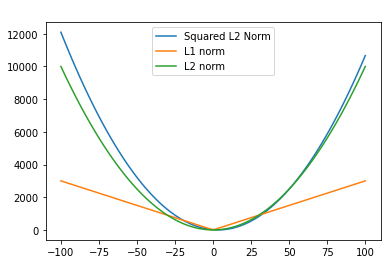

In [ ]:
def SE(x,y,intc,beta):
    return (1./len(x))*(0.5)*sum(y - beta * x - intc)**2

def L1(intc,beta,lam):
    return lam*(tf.abs(intc) + tf.abs(beta))

def L2(intc,beta,lam):
    return lam*(intc**2 + beta**2)

N = 100
x = np.random.randn(N)
y = 2 * x + np.random.randn(N)

beta_N = 100
beta = tf.linspace(-100., 100., beta_N)
intc = 0.0

SE_array = np.array([SE(x,y,intc,i) for i in beta])
L1_array = np.array([L1(intc,i,lam=30) for i in beta])
L2_array = np.array([L2(intc,i,lam=1) for i in beta])

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(beta, SE_array, label='Squared L2 Norm')
ax1.plot(beta, L1_array, label='L1 norm')
ax1.plot(beta, L2_array, label='L2 norm')
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'red'})
plt.title('The graph of each of the norms', color='w')
plt.legend()
fig1.show()

One other norm that commonly arises in machine learning is the $L^{\infty}$ norm, also known as the __max norm__. This norm simplifies to the absolute value of the element with the largest magnitude in the vector,

$$\color{Orange}{\parallel x \parallel_{\infty} = max_i |x_i| \tag{15}}$$

If we wish to measure the size of a matrix, in context of deep learning, the most common way to do this is with the __Frobenius norm__:

$$\color{Orange}{\parallel A \parallel_F = \sqrt{\displaystyle\sum_{i, j} A^2_{i, j}} \tag{16}}$$

which is analogous to the $L^{2}$ norm of a vector.

Meaning for example for a matrix:

$$
A =
\begin{pmatrix}
2 & -1 & 5 \\
0 & 2 & 1 \\
3  & 1 & 1  \\
\end{pmatrix}
$$
 
$||A|| = [2^2 + (-1^2) + 5^2 + 0^2 + 2^2 + 1^2 + 3^2 + 1^2 + 1^2]^{1/2}$


In [ ]:
n_matrix_A = tf.constant([[2, -1, 5], [0, 2, 1], [3, 1, 1]], name="matrix_A", dtype=tf.float32)

# Frobenius norm for matrix calculated by setting ord='fro'
frobenius_norm = tf.norm(n_matrix_A, ord='fro', axis=(0, 1))
print("Frobenius norm: {}".format(frobenius_norm))

Frobenius norm: 6.78233003616333



The dot product of two vectors can be rewritten in terms of norms as:

$$\color{Orange}{x^{\top} y = ||x||_2 ||y||_2 cos\theta \tag{17}}$$

where $\theta$ is the angle between $x$ and $y$.

Dot Product can be rewritten in terms of norms, where 

RHS: 4.0 
LHS: [[4.]]


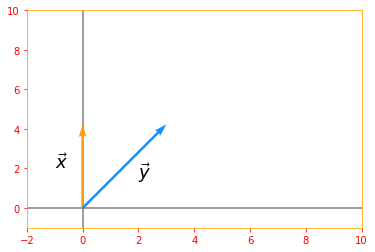

In [ ]:
# for x(0, 2) and y(2, 2) cos theta = 45 degrees
n_vector_x = tf.constant([[0], [2]], dtype=tf.float32, name="vectorX")
n_vector_y = tf.constant([[2], [2]], dtype=tf.float32, name="vectorY")

# Due to pi being in, we won't get an exact value so we are rounding our final value
prod_RHS = tf.round(tf.multiply(tf.multiply(tf.norm(n_vector_x), tf.norm(n_vector_y)), tf.cos(np.pi/4)))
prod_LHS = tf.tensordot(tf.transpose(n_vector_x), n_vector_y, axes=1, name="LHS")

predictor = tf.equal(prod_RHS, prod_LHS)
def true_print(): print("""Dot Product can be rewritten in terms of norms, where \n
RHS: {} \nLHS: {}""".format(prod_RHS, prod_LHS))

def false_print(): print("""Dot Product can not be rewritten in terms of norms, where \n
RHS: {} \nLHS: {}""".format(prod_RHS, prod_LHS))
    
tf.cond(predictor, true_print, false_print)

origin=[0,0]
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'red'})
plt.xlim(-2, 10)
plt.ylim(-1, 10)
plt.axvline(x=0, color='grey', zorder=0)
plt.axhline(y=0, color='grey', zorder=0)
plt.text(-1, 2, r'$\vec{x}$', size=18)
plt.text(2, 1.5, r'$\vec{y}$', size=18)
plt.quiver(*origin, n_vector_x[0], n_vector_y[0], color=['#FF9A13'], scale=8)
plt.quiver(*origin, n_vector_x[1], n_vector_y[1], color=['#1190FF'], scale=8)
plt.show()

# Matrix Norms Induced by Vector Norms

Suppose a vector norm $\|\cdot\|$ on $K^{m}$ is given. Any $m \times n$ matrix $A$ induces a linear operator from $K^{n}$ to $K^{m}$ with respect to the standard basis, and one defines the corresponding induced norm or operator norm on the space $K^{m \times n}$ of all $m \times n$ matrices as follows:
$$ \color{orange}{
\begin{aligned}
\|A\| &=\sup \left\{\|A x\|: x \in K^{n} \text { with }\|x\|=1\right\} \\
&=\sup \left\{\frac{\|A x\|}{\|x\|}: x \in K^{n} \text { with } x \neq 0\right\} .
\end{aligned}}
$$
In particular, if the $p$ -norm for vectors $(1 \leq p \leq \infty)$ is used for both spaces $K^{n}$ and $K^{m}$, then the corresponding induced operator norm is:
$$ \color{orange}{
\|A\|_{p}=\sup _{x \neq 0} \frac{\|A x\|_{p}}{\|x\|_{p}} .}
$$
__Note:__ These induced norms are different from the "entrywise" $p$ -norms and the schatten $p$ -norms for matrices treated below, which are also usually denoted by $\|A\|_{p}$

In the special cases of $p=1,2, \infty$, the induced matrix norms can be computed or estimated by $$\color{orange}{ \|A\|_{1}=\max _{1 \leq j \leq n} \sum_{i=1}^{m}\left|a_{i j}\right|}$$
which is simply the maximum absolute column sum of the matrix;
$$\color{orange}{|A\|_{\infty}=\max _{1 \leq i \leq m} \sum_{j=1}^{n}\left|a_{i j}\right|}$$
which is simply the maximum absolute row sum of the matrix; $\|A\|_{2}=\sigma_{\max }(A)$
where $\sigma_{\max }(A)$ represents the largest singular value of matrix $A$. There is an important inequality for the case $p=2$ :
$$\color{orange}{|A\|_{2}=\sigma_{\max }(A) \leq\|A\|_{\mathrm{F}}=\left(\sum_{i=1}^{m} \sum_{j=1}^{n}\left|a_{i j}\right|^{2}\right)^{\frac{1}{2}}}$$
where $\|A\|_{\mathrm{F}}$ is the Frobenius norm. Equality holds if and only if the matrix $A$ is a rank-one matrix or a zero matrix. This inequality can be derived from the fact that the trace of a matrix is equal to the sum of its eigenvalues.

When $p=2$ we have an equivalent definition for $\color{orange}{ \|A\|_{2}}$ as $\color{orange}{ \sup \left\{x^{T} A y: x, y \in K^{n}\right.}$ with $\color{orange}{ \left.\|x\|_{2}=\|y\|_{2}=1\right\}}$. It can be shown to be equivalent to the above definitions using the Cauchy-Schwarz inequality.

# Loss Funtions

Loss functions is a method of evaluating “how well your algorithm models your dataset”, these functions allows you to go from $Y \in \mathbb{R} ^{m \times n \times l \times \ldots}$ to $y \in \mathbb{R} $. If your predictions are totally off, your loss function will output a higher number. If they’re pretty good, it’ll output a lower number. As you tune your algorithm to try and improve your model, your loss function will tell you if you’re improving or not. ‘Loss’ helps us to understand how much the predicted value differ from actual value. In many applications, we can model our loss function as an optimization problem based on the previously viewed standards: 


$$\color{Orange}{min ||y - \hat{y}||_p = min \left( \big(\displaystyle\sum_i |y - \hat{y}|^p\big)^{1/p} \right),  \tag{12}}$$

where $y$ is the ground truth and $\hat{y}$ is the estimated value.

For more information about the different functions of loss and your application in certain problems, you can see the link: https://medium.com/@zeeshanmulla/cost-activation-loss-function-neural-network-deep-learning-what-are-these-91167825a4de

In [ ]:
#Create ground truth and estimated
y = tf.constant([1,2,3,4,5,6,7,8,9,0], dtype = tf.float32, name="Original")
y_est = tf.constant([1.3, 2.8, 4, 4, 5.3, 6.9, 7.1, 7.8, 9, 0.5], dtype = tf.float32, name="Estimated")
error = tf.losses.mse(y, y_est)

print("Gorung truth: {} \nEstimated: {} \nLoss: {:.3f}".format(y, y_est, error))

Gorung truth: [1. 2. 3. 4. 5. 6. 7. 8. 9. 0.] 
Estimated: [1.3 2.8 4.  4.  5.3 6.9 7.1 7.8 9.  0.5] 
Loss: 0.293


#Special Kinds of Matrices and Vectors

__Diagonal__ matrices consist mostly of zeros and have nonzero entries only along the main diagonal. Identity matrix is an example of diagonal matrix. We write $diag(v)$ to denote a square diagonal matrix whose diagonal entries are given by the entries of the vector *v*. 

To compute $diag(v)x$ we only need to scale each element $x_i$ by $v_i$. In other words:

$$\color{orange}{diag(v)x = v \odot x \tag{18}}$$

In [ ]:
# create vector v and x
sp_vector_v = tf.random.uniform([5], minval=0, maxval=10, dtype = tf.int32, seed = 0, name="vector_v")
sp_vector_x = tf.random.uniform([5], minval=0, maxval=10, dtype = tf.int32, seed = 0, name="vector_x")
print("Vector v: {} \nVector x: {}\n".format(sp_vector_v, sp_vector_x))
          
# RHS diagonal vector v dot diagonal vector x. The linalg.diag converts a vector to a diagonal matrix
sp_RHS = tf.tensordot(tf.linalg.diag(sp_vector_v), tf.linalg.diag(sp_vector_x), axes=1)

# LHS diag(v)x
sp_LHS = tf.multiply(tf.linalg.diag(sp_vector_v), sp_vector_x)
    
predictor = tf.reduce_all(tf.equal(sp_RHS, sp_LHS))
def true_print(): print("Diagonal of v times x: \n{} \n\nis equal to vector v dot vector x: \n{}".format(sp_RHS, sp_LHS))
def false_print(): print("Diagonal of v times x: \n{} \n\nis NOT equal to vector v dot vector x: \n{}".format(sp_RHS, sp_LHS))
    
tf.cond(predictor, true_print, false_print)

Vector v: [1 3 8 5 3] 
Vector x: [9 0 4 1 4]

Diagonal of v times x: 
[[ 9  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0 32  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 12]] 

is equal to vector v dot vector x: 
[[ 9  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0 32  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 12]]


Inverting a square diagonal matrix is also efficient. The inverse exists only if every diagonal entry is nonzero, and in that case:

$$\color{orange}{diag(v)^{-1} = diag([1/v_1, \cdots , 1/v_n]^{\top}) \tag{19}}$$


In [ ]:
try:
    # try creating a vector_v with zero elements and see what happens
    d_vector_v = tf.random.uniform([5], minval=1, maxval=10, dtype = tf.float32, seed = 0, name="vector_v")
    print("Vector v: {}".format(d_vector_v))
    
    # linalg.diag converts a vector to a diagonal matrix
    diag_RHS = tf.linalg.diag(tf.transpose(1. / d_vector_v))
    
    # we convert the vector to diagonal matrix and take it's inverse
    inv_LHS = tf.linalg.inv(tf.linalg.diag(d_vector_v))

    predictor = tf.reduce_all(tf.equal(diag_RHS, inv_LHS))
    def true_print(): print("The inverse of LHS: \n{} \n\nMatch the inverse of RHS: \n{}".format(diag_RHS, inv_LHS))
    def false_print(): print("The inverse of LHS: \n{} \n\n Does not match the inverse of RHS: \n{}".format(diag_RHS, inv_LHS))
    tf.cond(predictor, true_print, false_print)
    
except:
    print("The inverse exists only if every diagonal is nonzero, your vector looks: \n{}".format(d_vector_v))

Vector v: [1.9077636 9.731502  8.638878  1.4345318 1.4367076]
The inverse of LHS: 
[[0.524174   0.         0.         0.         0.        ]
 [0.         0.10275906 0.         0.         0.        ]
 [0.         0.         0.11575577 0.         0.        ]
 [0.         0.         0.         0.6970915  0.        ]
 [0.         0.         0.         0.         0.69603586]] 

Match the inverse of RHS: 
[[0.524174   0.         0.         0.         0.        ]
 [0.         0.10275906 0.         0.         0.        ]
 [0.         0.         0.11575577 0.         0.        ]
 [0.         0.         0.         0.6970915  0.        ]
 [0.         0.         0.         0.         0.69603586]]


Not all diagonal matrices need be square. It is possible to construct a rectangular diagonal matrix. Nonsquare diagonal matrices do not have inverses, but we can still multiply by them cheaply. For a nonsquare diagonal matrix $D$, the product $Dx$ will involve scaling each element of $x$ and either concatenating some zeros to the result, if $D$ is taller than it is wide, or discarding some of the last elements of the vector, if $D$ is wider than it is tall.

A __symmetric__ matrix is any matrix that is equal to its own transpose:

$A = A^{\top}$

Symmetric matrices often arise when the entries are generated by some function of two arguments that does not depend on the order of the arguments. For example, if $A$ is a matrix of distance measurements, with $A_{i,j}$ giving the distance from point *i* to point *j*, then $A_{i, j} = A_{j, i}$ because distance functions are symmetric.

In [ ]:
# create a symmetric matrix
sp_matrix_A = tf.constant([[0, 1, 3], [1, 2, 4], [3, 4, 5]], name="matrix_a", dtype=tf.int32)

# get the transpose of matrix A
sp_transpose_a = tf.transpose(sp_matrix_A)

predictor = tf.reduce_all(tf.equal(sp_matrix_A, sp_transpose_a))
def true_print(): print("Matrix A: \n{} \n\nMatches the the transpose of Matrix A: \n{}".format(sp_matrix_A, sp_transpose_a))
def false_print(): print("Matrix A: \n{} \n\nDoes Not match the the transpose of Matrix A: \n{}".format(sp_matrix_A, sp_transpose_a))

tf.cond(predictor, true_print, false_print)

Matrix A: 
[[0 1 3]
 [1 2 4]
 [3 4 5]] 

Matches the the transpose of Matrix A: 
[[0 1 3]
 [1 2 4]
 [3 4 5]]


A vector $x$ and a vector $y$ are __*orthogonal*__ to each other if $x^{\top} y = 0$. If both vectors have nonzero norm, this means that they are at a 90 degree angle to each other.

Vector x: [2. 2.] 
Vector y: [ 2. -2.]

X transpose times y = 0.0

Norm x: 2.8284270763397217 
Norm y: 2.8284270763397217

Angle between vector x and vector y is: 90.0 degrees


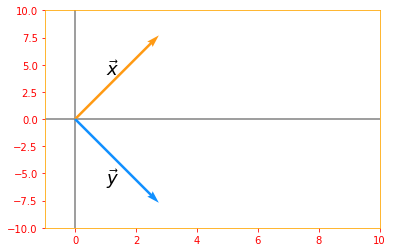

In [ ]:
# Lets create two vectors
ortho_vector_x = tf.constant([2, 2], dtype=tf.float32, name="vector_x")
ortho_vector_y = tf.constant([2, -2], dtype=tf.float32, name="vector_y")
print("Vector x: {} \nVector y: {}\n".format(ortho_vector_x, ortho_vector_y))

# lets verify if x transpose dot y is zero
ortho_LHS = tf.tensordot(tf.transpose(ortho_vector_x), ortho_vector_y, axes=1)
print("X transpose times y = {}\n".format(ortho_LHS))

# let's see what their norms are
ortho_norm_x = tf.norm(ortho_vector_x)
ortho_norm_y = tf.norm(ortho_vector_y)
print("Norm x: {} \nNorm y: {}\n".format(ortho_norm_x, ortho_norm_y))

# If they have non zero norm, let's see what angle they are to each other
if tf.logical_and(ortho_norm_x > 0, ortho_norm_y > 0):
    # from the equation cos theta = (x dot y)/(norm of x times norm y)
    cosine_angle = (tf.divide(tf.tensordot(ortho_vector_x, ortho_vector_y, axes=1), tf.multiply(ortho_norm_x, ortho_norm_y)))
    print("Angle between vector x and vector y is: {} degrees".format(tf.acos(cosine_angle) * 180 /np.pi))

    origin=[0,0]
    plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'red'})
    plt.xlim(-1, 10)
    plt.ylim(-10, 10)
    plt.axvline(x=0, color='grey', zorder=0)
    plt.axhline(y=0, color='grey', zorder=0)
    plt.text(1, 4, r'$\vec{x}$', size=18)
    plt.text(1, -6, r'$\vec{y}$', size=18)
    plt.quiver(*origin,ortho_vector_x[0], ortho_vector_y[0], color=['#FF9A13'], scale=8)
    plt.quiver(*origin,ortho_vector_x[1], ortho_vector_y[1], color=['#1190FF'], scale=8)
    plt.show()

A __unit vector__ is a vector with a __unit norm__: $||x||_2 = 1$.

If two vectors are not only are orthogonal but also have unit norm, we call them __orthonormal__.

A __orthogonal matrix__ is a square matrix whose rows are mutually orthonormal and whose columns are mutually orthonormal:

$$\color{Orange}{A^{\top} A = AA^{\top} = I \tag{20}}$$

which implies $A^{-1} = A^{\top}$

so orthogonal matrices are of interest because their inverse is very cheap to compute.

Matrix A: 
<tf.Variable 'matrixA:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.87758255, -0.47942555],
       [ 0.47942555,  0.87758255]], dtype=float32)>

Columns are orthogonal: -1.1908468877663836e-08
Rows are orthogonal: 1.1908468877663836e-08



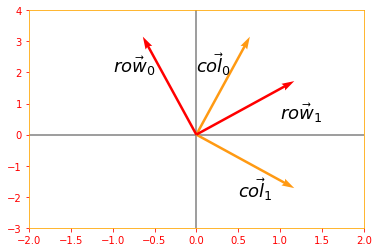

Inverse of Matrix A: 
[[ 0.87758255  0.47942555]
 [-0.47942555  0.87758255]] 

Equals the transpose of Matrix A: 
[[ 0.87758255  0.47942555]
 [-0.47942555  0.87758255]]


In [ ]:
# Lets use sine and cosine to create orthogonal matrix
ortho_matrix_A = tf.Variable([[tf.cos(.5), -tf.sin(.5)], [tf.sin(.5), tf.cos(.5)]], name="matrixA")
print("Matrix A: \n{}\n".format(ortho_matrix_A))

# extract columns from the matrix to verify if they are orthogonal
col_0 = tf.reshape(ortho_matrix_A[:, 0], [2, 1])
col_1 = tf.reshape(ortho_matrix_A[:, 1], [2, 1])
row_0 = tf.reshape(ortho_matrix_A[0, :], [2, 1])
row_1 = tf.reshape(ortho_matrix_A[1, :], [2, 1])

# Verifying if the columns are orthogonal
ortho_column = tf.tensordot(tf.transpose(col_0), col_1, axes=2)
print("Columns are orthogonal: {}".format(ortho_column))
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'red'})
origin = [0, 0]
plt.xlim(-2, 2)
plt.ylim(-3, 4)
plt.axvline(x=0, color='grey', zorder=0)
plt.axhline(y=0, color='grey', zorder=0)
plt.text(0, 2, r'$\vec{col_0}$', size=18)
plt.text(0.5, -2, r'$\vec{col_1}$', size=18)
plt.quiver(*origin, col_0[0], col_1[0], color=['#FF9A13'], scale=3)
plt.quiver(*origin, col_0[1], col_1[1], color=['#FF9A13'], scale=3)

# Verifying if the rows are orthogonal
ortho_row = tf.tensordot(tf.transpose(row_0), row_1, axes=2)
print("Rows are orthogonal: {}\n".format(ortho_row))
plt.text(-1, 2, r'$\vec{row_0}$', size=18)
plt.text(1, 0.5, r'$\vec{row_1}$', size=18)
plt.quiver(*origin, row_0[0], row_1[0], color=['r'], scale=3)
plt.quiver(*origin, row_0[1], row_1[1], color=['r'], scale=3)
plt.show()

# inverse of matrix A
ortho_inverse_A = tf.linalg.inv(ortho_matrix_A)

# Transpose of matrix A
ortho_transpose_A = tf.transpose(ortho_matrix_A)

predictor = tf.reduce_all(tf.equal(ortho_inverse_A, ortho_transpose_A))
def true_print(): print("Inverse of Matrix A: \n{} \n\nEquals the transpose of Matrix A: \n{}".format(ortho_inverse_A, ortho_transpose_A))
def false_print(): print("Inverse of Matrix A: \n{} \n\nDoes not equal the transpose of Matrix A: \n{}".format(ortho_inverse_A, ortho_transpose_A))

tf.cond(predictor, true_print, false_print)

#Eigendecomposition

We can represent a number, for example 12 as 12 = 2 x 2 x 3. The representation will change depending on whether we write it in base ten or in binary but the above representation will always be true and from that we can conclude that 12 is not divisible by 5 and that any integer multiple of 12 will be divisible by 3. 

Similarly, we can also decompose matrices in ways that show us information about their functional properties that is not obvious from the representation of the matrix as an array of elements. One of the most widely used kinds of matrix decomposition is called __eigendecomposition__, in which we decompose a matrix into a set of eigenvectors and eigenvalues.

An __eigenvector__ of a square matrix $A$ is a nonzero vector $v$ such that multiplication by $A$ alters only the scale of $v$, in short this is a special vector that doesn't change the direction of the matrix when applied to it :

$$\color{Orange}{Av = \lambda v \tag{21}}$$

The scale $\lambda$ is known as the __eigenvalue__ corresponding to this eigenvector.

Matrix A: 
[[5.710063  9.660898 ]
 [8.952183  3.1878648]]

Eigen Vectors: 
[[-0.65593696  0.75481564]
 [ 0.75481564  0.65593696]] 

Eigen Values: 
[-4.591608 13.489536]



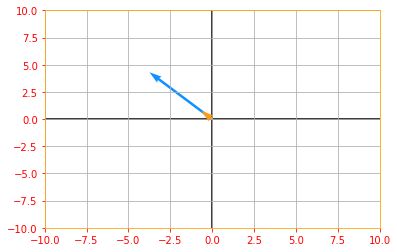

In [ ]:
# Let's see how we can compute the eigen vectors and values from a matrix
e_matrix_A = tf.random.uniform([2, 2], minval=3, maxval=10, dtype=tf.float32, name="matrixA")
print("Matrix A: \n{}\n".format(e_matrix_A))

# Calculating the eigen values and vectors using tf.linalg.eigh, if you only want the values you can use eigvalsh
eigen_values_A, eigen_vectors_A = tf.linalg.eigh(e_matrix_A)
print("Eigen Vectors: \n{} \n\nEigen Values: \n{}\n".format(eigen_vectors_A, eigen_values_A))

# Now lets plot our Matrix with the Eigen vector and see how it looks
Av = tf.tensordot(e_matrix_A, eigen_vectors_A, axes=0)
vector_plot([tf.reshape(Av, [-1]), tf.reshape(eigen_vectors_A, [-1])], 10, 10)

If $v$ is an eigenvector of $A$, then so is any rescaled vector $sv$ for $s \in \mathbb{R}, s \neq 0$.

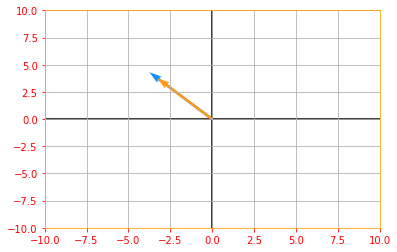

In [ ]:
# Lets us multiply our eigen vector by a random value s and plot the above graph again to see the rescaling
sv = tf.multiply(5, eigen_vectors_A)
vector_plot([tf.reshape(Av, [-1]), tf.reshape(sv, [-1])], 10, 10)

Suppose that a matrix $A$ has $n$ linearly independent eigenvectors $\{v^{(1)}, \cdots, v^{(n)}\}$ with corresponding eigenvalues $\{\lambda_{(1)}, \cdots, \lambda_{(n)}\}$. We may concatenate all the eigenvectors to form a matrix $V$ with one eigenvector per column: $V = [v^{(1)}, \cdots, v^{(n)}]$. Likewise, we can concatenate the eigenvalues to form a vector $\lambda = [\lambda_{(1)}, \cdots, \lambda_{(n)}]^{\top}$. The __eigendecomposition__ of $A$ is then given by

$$\color{Orange}{A = V diag(\lambda)V^{-1} \tag{22}}$$


In [ ]:
# Creating a matrix A to find it's decomposition
eig_matrix_A = tf.constant([[5, 1], [3, 3]], dtype=tf.float32)
new_eigen_values_A, new_eigen_vectors_A = tf.linalg.eigh(eig_matrix_A)

print("Eigen Values of Matrix A: {} \n\nEigen Vector of Matrix A: \n{}\n".format(new_eigen_values_A, new_eigen_vectors_A))

# calculate the diag(lamda)
diag_lambda = tf.linalg.diag(new_eigen_values_A)
print("Diagonal of Lambda: \n{}\n".format(diag_lambda))

# Find the eigendecomposition of matrix A
decomp_A = tf.tensordot(tf.tensordot(eigen_vectors_A, diag_lambda, axes=1), tf.linalg.inv(new_eigen_vectors_A), axes=1)

print("The decomposition Matrix A: \n{}".format(decomp_A))

Eigen Values of Matrix A: [0.8377223 7.1622777] 

Eigen Vector of Matrix A: 
[[-0.5847103   0.81124216]
 [ 0.81124216  0.5847103 ]]

Diagonal of Lambda: 
[[0.8377223 0.       ]
 [0.        7.1622777]]

The decomposition Matrix A: 
[[4.707031  2.7152884]
 [3.4414904 3.2599401]]


Not every matrix can be decomposed into eigenvalues and eigenvectors. In some cases, the decomposition exists but involves complex rather than real numbers.

In this book, we usually need to decompose only a specific class of matrices that have a simple decomposition. Specifically, every real symmetric matrix can be decomposed into an expression using only real-valued eigenvectors and eigenvalues:

$$\color{Orange}{A = Q \Lambda Q^{\top} \tag{23}}$$

where $Q$ is an orthogonal matrix composed of eigenvectors of $A$ and $\Lambda$ is a diagonal matrix. The eigenvalue $\Lambda_{i,i}$ is associated with the eigenvector in column *i* of $Q$, denoted as $Q_{:, i}$. Because $Q$ is an orthogonal matrix, we can think of $A$ as scaling space by $\Lambda_i$ in direction $v^{(i)}$.

In [ ]:
# In section 2.6 we manually created a matrix to verify if it is symmetric, but what if we don't know the exact values and want to create a random symmetric matrix
new_matrix_A = tf.Variable(tf.random.uniform([2,2], minval=1, maxval=10, dtype=tf.float32))

# to create an upper triangular matrix from a square one
X_upper = tf.linalg.band_part(new_matrix_A, 0, -1)
sym_matrix_A = tf.multiply(0.5, (X_upper + tf.transpose(X_upper)))
print("Symmetric Matrix A: \n{}\n".format(sym_matrix_A))

# create orthogonal matrix Q from eigen vectors of A
eigen_values_Q, eigen_vectors_Q = tf.linalg.eigh(sym_matrix_A)
print("Matrix Q: \n{}\n".format(eigen_vectors_Q))

# putting eigen values in a diagonal matrix
new_diag_lambda = tf.linalg.diag(eigen_values_Q)
print("Matrix Lambda: \n{}\n".format(new_diag_lambda))

sym_RHS = tf.tensordot(tf.tensordot(eigen_vectors_Q, new_diag_lambda, axes=1), tf.transpose(eigen_vectors_Q), axes=1)

predictor = tf.reduce_all(tf.equal(tf.round(sym_RHS), tf.round(sym_matrix_A)))
def true_print(): print("It WORKS. \nRHS: \n{} \n\nLHS: \n{}".format(sym_RHS, sym_matrix_A))
def false_print(): print("Condition FAILED. \nRHS: \n{} \n\nLHS: \n{}".format(sym_RHS, sym_matrix_A))

tf.cond(predictor, true_print, false_print)

Symmetric Matrix A: 
[[6.449999  3.0690422]
 [3.0690422 8.044266 ]]

Matrix Q: 
[[-0.79100955 -0.6118038 ]
 [ 0.6118038  -0.79100955]]

Matrix Lambda: 
[[ 4.0762587  0.       ]
 [ 0.        10.418007 ]]

It WORKS. 
RHS: 
[[6.45      3.0690424]
 [3.0690424 8.044266 ]] 

LHS: 
[[6.449999  3.0690422]
 [3.0690422 8.044266 ]]


The eigendecomposition of a matrix tells us many useful facts about the matrix. The matrix is singular if and only if any of the eigenvalues are zero. The eigendecomposition of a real symmetric matrix can also be used to optimize quadratic expressions of the form$f(x) = x^{\top} Ax$ subject to $||x||_2 = 1$. 

The above equation can be solved as following, we know that if $x$ is an Eigenvector of $A$ and $\lambda$ is the corresponding eigenvalue, then $Ax = \lambda x$, therefore $f(x) = x^{\top} Ax = x^{\top} \lambda x = x^{\top} x \lambda$ and since $||x||_2 = 1$ and $x^{\top} x =1$, the above equation boils down to $f(x) = \lambda$

Whenever $x$ is equal to an eigenvector of $A, \ f$ takes on the value of the corresponding eigenvalue and its minimum value within the constraint region is the minimum eigenvalue.

A matrix whose eigenvalues are all positive is called __positive definite__. A matrix whose eigenvalues are all positive or zero valued is called __positive semidefinite__. Likewise, if all eigenvalues are negative, the matrix is __negative definite__, and if all eigenvalues are negative or zero valued, it is __negative semidefinite__. Positive semidefinite matrices are interesting because they guarantee that $\forall x, x^{\top} Ax \geq 0$. Positive definite matrices additionally guarantee that $x^{\top} Ax = 0 \implies x=0$.

![Eigenvalue plots](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0207a.PNG)

#Singular Value Decomposition

The __singular value decomposition (SVD)__ provides another way to factorize a matrix into  __singular vectors__ and __singular values__. The SVD enables us to discover some of the same kind of information as the eigendecomposition reveals, however, the SVD is more generally applicable. Every real matrix has a singular value decomposition, but the same is not true of the eigenvalue decomposition. SVD can be written as:

$$\color{Orange}{A = UDV^{\top} \tag{24}}$$

Suppose $A$ is an *m x n* matrix, then $U$ is defined to be an *m x m* rotation matrix, $D$ to be an *m x n* matrix scaling & projecting matrix, and $V$ to be an *n x n* rotation matrix.

Each of these matrices is defined to have a special structure. The matrices $U$ and $V$ are both defined to be orthogonal matrices $(U^{\top} = U^{-1} \ \text{and} \ V^{\top} = V^{-1})$. The matrix $D$ is defined to be a diagonal matrix.

The elements along the diagonal of $D$ are known as the __singular values__ of the matrix $A$. The columns of $U$ are known as the __left-singular vectors__. The columns of $V$ are known as the __right-singular vectors__.

![Singular Value Decomposition](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0208a.png)

In [ ]:
# mxn matrix A
svd_matrix_A = tf.constant([[2, 3], [4, 5], [6, 7]], dtype=tf.float32)
print("Matrix A: \n{}\n".format(svd_matrix_A))

# Using tf.linalg.svd to calculate the singular value decomposition where d: Matrix D, u: Matrix U and v: Matrix V
d, u, v = tf.linalg.svd(svd_matrix_A, full_matrices=True, compute_uv=True)
print("Diagonal D: \n{} \n\nMatrix U: \n{} \n\nMatrix V^T: \n{}".format(d, u, v))

Matrix A: 
[[2. 3.]
 [4. 5.]
 [6. 7.]]

Diagonal D: 
[11.782491    0.41578525] 

Matrix U: 
[[ 0.30449855 -0.86058956  0.40824753]
 [ 0.54340035 -0.19506174 -0.81649673]
 [ 0.7823021   0.47046402  0.4082487 ]] 

Matrix V^T: 
[[ 0.63453555  0.7728936 ]
 [ 0.7728936  -0.63453555]]


In [ ]:
# Lets see if we can bring back the original matrix from the values we have

# mxm orthogonal matrix U
svd_matrix_U = tf.constant([[0.30449855, -0.86058956, 0.40824753], [0.54340035, -0.19506174, -0.81649673], [0.78230214, 0.47046405, 0.40824872]])
print("Orthogonal Matrix U: \n{}\n".format(svd_matrix_U))

# mxn diagonal matrix D
svd_matrix_D = tf.constant([[11.782492, 0], [0, 0.41578525], [0, 0]], dtype=tf.float32)
print("Diagonal Matrix D: \n{}\n".format(svd_matrix_D))

# nxn transpose of matrix V
svd_matrix_V_trans = tf.constant([[0.63453555, 0.7728936], [0.7728936, -0.63453555]], dtype=tf.float32)
print("Transpose Matrix V: \n{}\n".format(svd_matrix_V_trans))

# UDV(^T)
svd_RHS = tf.tensordot(tf.tensordot(svd_matrix_U, svd_matrix_D, axes=1), svd_matrix_V_trans, axes=1)

predictor = tf.reduce_all(tf.equal(tf.round(svd_RHS), svd_matrix_A))
def true_print(): print("It WORKS. \nRHS: \n{} \n\nLHS: \n{}".format(tf.round(svd_RHS), svd_matrix_A))
def false_print(): print("Condition FAILED. \nRHS: \n{} \n\nLHS: \n{}".format(tf.round(svd_RHS), svd_matrix_A))
    
tf.cond(predictor, true_print, false_print)

Orthogonal Matrix U: 
[[ 0.30449855 -0.86058956  0.40824753]
 [ 0.54340035 -0.19506174 -0.81649673]
 [ 0.78230214  0.47046405  0.40824872]]

Diagonal Matrix D: 
[[11.782492    0.        ]
 [ 0.          0.41578525]
 [ 0.          0.        ]]

Transpose Matrix V: 
[[ 0.63453555  0.7728936 ]
 [ 0.7728936  -0.63453555]]

It WORKS. 
RHS: 
[[2. 3.]
 [4. 5.]
 [6. 7.]] 

LHS: 
[[2. 3.]
 [4. 5.]
 [6. 7.]]


Matrix $A$ can be seen as a linear transformation. This transformation can be decomposed into three sub-transformations: 

1. Rotation, 
2. Re-scaling and projecting, 
3. Rotation. 

These three steps correspond to the three matrices $U, D \ \text{and} \ V$

Let's see how these transformations are taking place in order

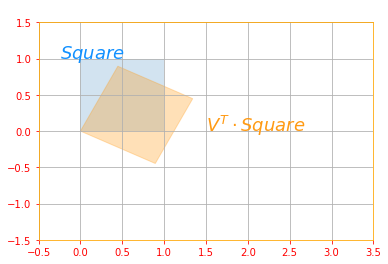

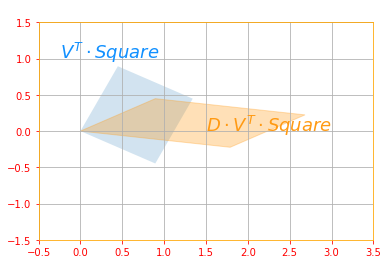

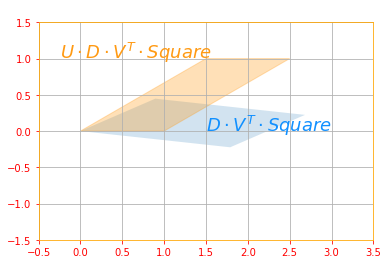

In [ ]:
# Let's define a unit square
svd_square = tf.constant([[0, 0, 1, 1],[0, 1, 1, 0]], dtype=tf.float32)

# a new 2x2 matrix
svd_new_matrix = tf.constant([[1, 1.5], [0, 1]])

# SVD for the new matrix
new_d, new_u, new_v = tf.linalg.svd(svd_new_matrix, full_matrices=True, compute_uv=True)

# lets' change d into a diagonal matrix
new_d_marix = tf.linalg.diag(new_d)

# Rotation: V^T for a unit square
plot_transform(svd_square, tf.tensordot(new_v, svd_square, axes=1), "$Square$", "$V^T \cdot Square$", "Rotation", axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

# Scaling and Projecting: DV^(T)
plot_transform(tf.tensordot(new_v, svd_square, axes=1), tf.tensordot(new_d_marix, tf.tensordot(new_v, svd_square, axes=1), axes=1), "$V^T \cdot Square$", "$D \cdot V^T \cdot Square$", 
               "Scaling and Projecting", axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

# Second Rotation: UDV^(T)
trans_1 = tf.tensordot(tf.tensordot(new_d_marix, new_v, axes=1), svd_square, axes=1)
trans_2 = tf.tensordot(tf.tensordot(tf.tensordot(new_u, new_d_marix, axes=1), new_v, axes=1), svd_square, axes=1)
plot_transform(trans_1, trans_2,"$U \cdot D \cdot V^T \cdot Square$", "$D \cdot V^T \cdot Square$", 
                    "Second Rotation", color=['#1190FF', '#FF9A13'], axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

The above sub transformations can be found for each matrix as follows:

- $U$ corresponds to the eigenvectors of $A A^{\top}$ 
- $V$ corresponds to the eigenvectors of $A^{\top} A$
- $D$ corresponds to the eigenvalues $A A^{\top}$  or $A^{\top} A$ which are the same.

As an exercise try proving this is the case.

Perhaps the most useful feature of the SVD is that we can use it to partially generalize matrix inversion to nonsquare matrices, as we will see in the next section.

#The Moore-Penrose Pseudoinverse

Matrix inversion is not defined for matrices that are not square. Suppose we want to make a left-inverse $B$ of a matrix $A$ so that we can solve a linear equation $Ax = Y$ by left multiplying each side to obtain $x = By$.

Depending on the structure of the problem, it may not be possible to design a unique mapping from $A$ to $B$.

The __Moore-Penrose pseudoinverse__ enables use to make some headway in these cases. The pseudoinverse of $A$ is defined as a matrix:

$$\color{Orange}{A^+ = lim_{\alpha \rightarrow 0} (A^T A + \alpha I)^{-1} A^{\top} \tag{25}}$$

Practical algorithms for computing the pseudoinverse are based not on this definition, but rather on the formula:

$$\color{Orange}{A^+ = VD^+U^{\top} \tag{26}}$$

where $U, D$ and $V$ are the singular decomposition of $A$ and the pseudoinverse of $D^+$ of a diagonal matrix $D$ is obtained by taking the reciprocal of its nonzero elements then taking the transpose of the resulting matrix.

In [ ]:
# Matrix A
mpp_matrix_A = tf.random.uniform([3, 2], minval=1, maxval=10, dtype=tf.float32)
print("Matrix A: \n{}\n".format(mpp_matrix_A))

# Singular Value decomposition of matrix A
mpp_d, mpp_u, mpp_v = tf.linalg.svd(mpp_matrix_A, full_matrices=True, compute_uv=True)
print("Matrix U: \n{} \n\nMatrix V: \n{}\n".format(mpp_u, mpp_v))

# pseudo inverse of matrix D
d_plus = tf.concat([tf.transpose(tf.linalg.diag(tf.math.reciprocal(mpp_d))), tf.zeros([2, 1])], axis=1)
print("D plus: \n{}\n".format(d_plus))

# moore-penrose pseudoinverse of matrix A
matrix_A_star = tf.matmul(tf.matmul(mpp_v, d_plus, transpose_a=True), mpp_u, transpose_b=True)

print("The Moore-Penrose pseudoinverse of Matrix A: \n{}".format(matrix_A_star))

Matrix A: 
[[9.140357  9.144182 ]
 [6.204524  1.2572753]
 [9.130296  3.1738477]]

Matrix U: 
[[ 0.751305    0.6498225  -0.11520312]
 [ 0.35091314 -0.54119194 -0.7641801 ]
 [ 0.5589285  -0.533706    0.63463134]] 

Matrix V: 
[[ 0.8414404  -0.54034996]
 [ 0.54034996  0.8414404 ]]

D plus: 
[[0.05947573 0.         0.        ]
 [0.         0.23584515 0.        ]]

The Moore-Penrose pseudoinverse of Matrix A: 
[[ 0.12041194 -0.05140737 -0.04004319]
 [ 0.10481181 -0.11867688 -0.12387644]]


When $A$ has more columns than rows, then solving a linear equation using the pseudoinverse provides one of the many possible solutions. Specifically, it provides the solution $x = A^+y$ with minimal Euclidean norm $||x||_2$ among all possible solutions.

In [ ]:
mpp_vector_y = tf.constant([[2], [3], [4]], dtype=tf.float32)
print("Vector y: \n{}\n".format(mpp_vector_y))

mpp_vector_x = tf.matmul(matrix_A_star, mpp_vector_y)
print("Vector x: \n{}".format(mpp_vector_x))

Vector y: 
[[2.]
 [3.]
 [4.]]

Vector x: 
[[-0.07357098]
 [-0.64191276]]


When $A$ has more rows than columns, it is possible for there to be no solution. In this case, using the pseudoinverse gives us the $x$ for which $Ax$ is as close as possible to $y$ in terms of Euclidean norm $||Ax - y||_2$

#The Trace Operator

The trace operator gives the sum of all the diagonal entries of a matrix:

$$\color{Orange}{Tr(A) = \displaystyle\sum_i A_{i,i} \tag{27}}$$


In [ ]:
# random 3x3 matrix A
to_matrix_A = tf.random.uniform([3, 3], minval=0, maxval=10, dtype=tf.float32)

# trace of matrix A using tf.linalg.trace
trace_matrix_A = tf.linalg.trace(to_matrix_A)

print("Trace of Matrix A: \n{} \nis: {}".format(to_matrix_A, trace_matrix_A))

Trace of Matrix A: 
[[6.798562   6.262808   6.0092583 ]
 [5.140196   5.187434   0.69352627]
 [0.85868835 2.9870343  0.84777594]] 
is: 12.833772659301758


The trace operator is useful for a variety of reasons. Some operations that are difficult to specify without resorting to summation notation can be specified using matrix products and the trace operator. For example, the trace operator provides
an alternative way of writing the Frobenius norm of a matrix:

$$\color{Orange}{||A||_F = \sqrt{Tr(AA^{\top})} \tag{28}}$$


In [ ]:
# Frobenius Norm of A
frobenius_A = tf.norm(to_matrix_A)

# sqrt(Tr(A times A^T))
trace_rhs = tf.sqrt(tf.linalg.trace(tf.matmul(to_matrix_A, to_matrix_A, transpose_b=True)))

predictor = tf.equal(tf.round(frobenius_A), tf.round(trace_rhs))
def true_print(): print("It WORKS. \nRHS: {} \nLHS: {}".format(frobenius_A, trace_rhs))
def false_print(): print("Condition FAILED. \nRHS: {} \nLHS: {}".format(frobenius_A, trace_rhs))
    
tf.cond(predictor, true_print, false_print)

It WORKS. 
RHS: 13.628826141357422 
LHS: 13.628826141357422


Writing an expression in terms of the trace operator opens up opportunities to manipulate the expression using many useful identities. For example, the trace operator is invariant to the transpose operator:

$$\color{Orange}{Tr(A) = Tr(A^{\top}) \tag{29}}$$


In [ ]:
# Transpose of Matrix A
trans_matrix_A = tf.transpose(to_matrix_A)

#Trace of the transpose Matrix A
trace_trans_A = tf.linalg.trace(trans_matrix_A)

predictor = tf.equal(trace_matrix_A, trace_trans_A)
def true_print(): print("It WORKS. \nRHS: {} \nLHS: {}".format(trace_matrix_A, trace_trans_A))
def false_print(): print("Condition FAILED. \nRHS: {} \nLHS: {}".format(trace_matrix_A, trace_trans_A))
    
tf.cond(predictor, true_print, false_print)

It WORKS. 
RHS: 12.833772659301758 
LHS: 12.833772659301758


The trace of a square matrix composed of many factors is also invariant to moving the last factor into the first position, if the shapes of the corresponding matrices allow the resulting product to be defined:

$$\color{Orange}{Tr(ABC) = Tr(CAB) = TR(BCA) \tag{30}}$$


In [ ]:
# random 3x3 matrix B and matrix C
to_matrix_B = tf.random.uniform([3, 3], minval=0, maxval=10, dtype=tf.float32)
to_matrix_C = tf.random.uniform([3, 3], minval=0, maxval=10, dtype=tf.float32)

# ABC
abc = tf.tensordot((tf.tensordot(to_matrix_A, to_matrix_B, axes=1)), to_matrix_C, axes=1)

# CAB
cab = tf.tensordot((tf.tensordot(to_matrix_C, to_matrix_A, axes=1)), to_matrix_B, axes=1)

# BCA
bca = tf.tensordot((tf.tensordot(to_matrix_B, to_matrix_C, axes=1)), to_matrix_A, axes=1)

# trace of matrix ABC, CAB and matrix BCA
trace_matrix_abc = tf.linalg.trace(abc)
trace_matrix_cab = tf.linalg.trace(cab)
trace_matrix_bca = tf.linalg.trace(bca)

predictor = tf.equal(tf.round(trace_matrix_abc), tf.round(trace_matrix_cab)) and tf.equal(tf.round(trace_matrix_cab), tf.round(trace_matrix_bca))
def true_print(): print("It WORKS. \nABC: {} \nCAB: {} \nBCA: {}".format(trace_matrix_abc, trace_matrix_cab, trace_matrix_bca))
def false_print(): print("Condition FAILED. \nABC: {} \nCAB: {} \nBCA: {}".format(trace_matrix_abc, trace_matrix_cab, trace_matrix_bca))
    
tf.cond(predictor, true_print, false_print)

It WORKS. 
ABC: 4115.921875 
CAB: 4115.921875 
BCA: 4115.92138671875


This invariance to cyclic permutation holds even if the resulting product has a different shape. For example, for $A \in \mathbb{R}^{m \times n}$ and $B \in \mathbb{R}^{n \times m}$, we have $Tr(AB) = Tr(BA)$ even though $AB \in \mathbb{R}^{m \times m}$ and $BA \in \mathbb{R}^{n \times n}$

In [ ]:
# mxn matrix A
to_new_matrix_A = tf.random.uniform([3, 2], minval=0, maxval=10, dtype=tf.float32)
print(" 3x2 Matrix A: \n{}\n".format(to_new_matrix_A))

# mxn matrix B
to_new_matrix_B = tf.random.uniform([2, 3], minval=0, maxval=10, dtype=tf.float32)
print(" 3x2 Matrix B: \n{}\n".format(to_new_matrix_B))

# trace of matrix AB and BA
ab = tf.linalg.trace(tf.matmul(to_new_matrix_A, to_new_matrix_B))
ba = tf.linalg.trace(tf.matmul(to_new_matrix_B, to_new_matrix_A))

predictor = tf.equal(tf.round(ab), tf.round(ba))
def true_print(): print("It WORKS. \nAB: {} \nBA: {}".format(ab, ba))
def false_print(): print("Condition FAILED. \nAB: {} \nBA: {}".format(ab, ba))
    
tf.cond(predictor, true_print, false_print)

 3x2 Matrix A: 
[[6.908387  5.509219 ]
 [3.0871415 2.7304804]
 [8.388739  3.4471464]]

 3x2 Matrix B: 
[[8.7878227e-01 8.0643549e+00 5.8889389e-04]
 [2.8471684e+00 9.6426525e+00 9.6638098e+00]]

It WORKS. 
AB: 106.29902648925781 
BA: 106.29902648925781


#Example: Principal Components Analysis

PCA is a complexity reduction technique that tries to reduce a set of variables down to a smaller set of components that represent most of the information in the variables. This can be thought of as for a collection of data points applying lossy compression, meaning storing the points in a way that require less memory by trading some precision. At a conceptual level, PCA works by identifying sets of variables that share variance, and creating a component to represent that variance.

Earlier, when we were doing transpose or the matrix inverse, we relied on using Tensorflow's built in functions but for PCA, there is no such function, except one in the Tensorflow Extended (tft).

There are multiple ways you can implement a PCA in Tensorflow but since this algorithm is such an important one in the machine learning world, we will take the long route.

The reason for having PCA under Linear Algebra is to show that PCA could be implemented using the theorems we studied in this Chapter.

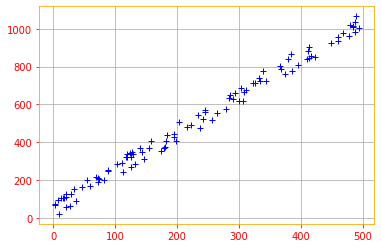

In [ ]:
# To start working with PCA, let's start by creating a 2D data set

x_data = tf.multiply(5, tf.random.uniform([100], minval=0, maxval=100, dtype = tf.float32, seed = 0))
y_data = tf.multiply(2, x_data) + 1 + tf.random.uniform([100], minval=0, maxval=100, dtype = tf.float32, seed = 0)

X = tf.stack([x_data, y_data], axis=1)

plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'red'})
plt.plot(X[:,0], X[:,1], '+', color='b')
plt.grid()

We start by standardizing the data. Even though the data we created are on the same scales, its always a good practice to start by standardizing the data because most of the time the data you will be working with will be in different scales.

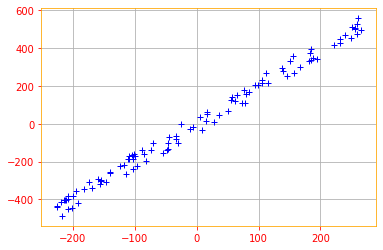

In [ ]:
def normalize(data):
    # creates a copy of data
    X = tf.identity(data)
    # calculates the mean
    X -=tf.reduce_mean(data, axis=0)
    return X

normalized_data = normalize(X)
plt.plot(normalized_data[:,0], normalized_data[:,1], '+', color='b')
plt.grid()

Recall that PCA can be thought of as applying lossy compression to a collection of $x$ data points. The way we can minimize the loss of precision is by finding some decoding function $f(x) \approx c$ where $c$ will be the corresponding vector. 

PCA is defined by our choice of this decoding function. Specifically, to make the decoder very simple, we chose to use matrix multiplication to map $c$ and define $g(c) = Dc$. Our goal is to minimize the distance between the input point $x$ to its reconstruction and to do that we use $L^2$ norm. Which boils down to our encoding function $c = D^{\top}x$.

Finally, to reconstruct the PCA we use the same matrix $D$ to decode all the points and to solve this optimization problem, we use eigendecomposition.

Please note that the following equation is the final version of a lot of matrix transformations. I don't provide the derivatives because the goal is to focus on the mathematical implementation, rather than the derivation. But for the curious, You can serach about the derivation in the guide book.

$$\color{Orange}{d^* = argmax_d \ Tr(d^{\top} X^{\top} Xd) \ \text{subject to} \ dd^{\top} = 1 \tag{31}}$$

To find $d$ we can calculate the eigenvectors $X^{\top} X$.


In [ ]:
# Finding the Eigne Values and Vectors for the data
eigen_values, eigen_vectors = tf.linalg.eigh(tf.tensordot(tf.transpose(normalized_data), normalized_data, axes=1))

print("Eigen Vectors: \n{} \nEigen Values: \n{}".format(eigen_vectors, eigen_values))

Eigen Vectors: 
[[-0.8908606  -0.45427677]
 [ 0.45427677 -0.8908606 ]] 
Eigen Values: 
[   16500.225 11025235.   ]


The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude.

Now, let's use these Eigenvectors to rotate our data. The goal of the rotation is to end up with a new coordinate system where data is uncorrelated and thus where the basis axes gather all the variance. Thereby reducing the dimension.

Recall our encoding function $c = D^{\top} x$, where $D$ is the matrix containing the eigenvectors that we have calculated before.

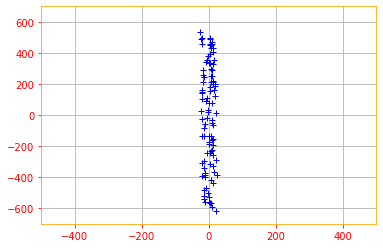

In [ ]:
X_new = tf.tensordot(tf.transpose(eigen_vectors), tf.transpose(normalized_data), axes=1)

plt.plot(X_new[0, :], X_new[1, :], '+', color='b')
plt.xlim(-500, 500)
plt.ylim(-700, 700)
plt.grid()

# 💫 Congratulations

You have successfully completed Section 1. To recap, we went through the following concepts:

- Scalars, Vectors, Matrices and Tensors
- Multiplying Matrices and Vectors
- Identity and Inverse Matrices
- Linear Dependence and Span
- Norms and loss functions
- Special Kinds of Matrices and Vectors
- Eigendecomposition
- Singular Value Decomposition
- The Moore-Penrose Pseudoinverse
- The Trace Operator
- The Determinant
- Example: Principal Components Analysis

We covered a lot of content in one notebook, like I mentioned in the begining, this is not meant to be an absolute beginner or a comprehensive chapter on Linear Algebra, our focus is Deep Learning with Tensorflow, so we only went through the material we need to understand Deep Learning. 

I tried to minimize the mathematics and focus more on the implementation side but if you like to study linear algebra on all of it's glory, or just want to read more about few sections take a look at [Linear Algebra by Jim Hefferon](http://joshua.smcvt.edu/linearalgebra/book.pdf) or [A First Course in Linear Algebra by Robert A. Beezer](http://linear.ups.edu/download/fcla-3.40-tablet.pdf). 

<!--NAVIGATION-->
< [01.00 - Preface](01.00-Introduction.ipynb) | [Contents](Index.ipynb) | [03.00 - Probability and Information Theory](03.00-Probability-and-Information-Theory.ipynb) >

<a href="https://colab.research.google.com/github/adhiraiyan/DeepLearningWithTF2.0/blob/master/notebooks/02.00-Linear-Algebra.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
